
---

# **Getting started** ⏭


## **Install and import the required libraries** ⏬

In [1]:
# install pandas profiling library
!pip uninstall -y pandas-profiling --quiet
!pip install -U pandas-profiling --quiet

In [2]:
# import the required libraries
import pandas as pd
import ydata_profiling as pdpf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(np.__version__)

1.21.5


## **Load the dataset** 💽

In [4]:
# read training data 
df = pd.read_excel('dataset1.xlsx')
df.head()

water_ID    clor  conductivity  dissolvedoxygen      pH  pressure  \
0         1  3.9739    753.822743            6.588  6.9573     4.971   
1         2  4.0000    785.154970            7.000  6.9146     5.000   
2         3  3.9739    753.822743            6.588  6.9573     5.029   
3         4  4.0000    785.154970            6.176  6.9146     5.058   
4         5  3.9739    753.822743            6.588  6.9573     5.029   

   turbidity  temperature  corr-DO2  corr-PH  suspend-Turb  corr-TempPh  \
0     7.0839       23.247         0        0             0            0   
1     7.1678       22.494         0        0             0            0   
2     7.2517       21.741         0        0             0            0   
3     7.3356       20.988         0        0             0            0   
4     7.4195       20.235         0        0             0            0   

   crack-Pressure  corr-Cond  Fault  
0               0          0      0  
1               0          0      0  
2               0          0      0  
3               0          0      0  
4               0          0      0

In [5]:
# total number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 100000, Number of columns: 15


# **Data Preparation** ⚙️

## **Exploratory data analysis** 🔍

In [6]:
df.info() # there are no null values, as it turns out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   water_ID         100000 non-null  int64  
 1   clor             100000 non-null  float64
 2   conductivity     100000 non-null  float64
 3   dissolvedoxygen  100000 non-null  float64
 4   pH               100000 non-null  float64
 5   pressure         100000 non-null  float64
 6   turbidity        100000 non-null  float64
 7   temperature      100000 non-null  float64
 8   corr-DO2         100000 non-null  int64  
 9   corr-PH          100000 non-null  int64  
 10  suspend-Turb     100000 non-null  int64  
 11  corr-TempPh      100000 non-null  int64  
 12  crack-Pressure   100000 non-null  int64  
 13  corr-Cond        100000 non-null  int64  
 14  Fault            100000 non-null  int64  
dtypes: float64(7), int64(8)
memory usage: 11.4 MB


In [7]:
# overall descriptive information on numerical attributes
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe().transpose()

count          mean           std       min           25%  \
water_ID         100000.0  50000.500000  28867.657797  1.000000  25000.750000   
clor             100000.0      5.808211      2.855048 -0.026100      3.366900   
conductivity     100000.0   1093.225884    680.738273  7.538942    534.497148   
dissolvedoxygen  100000.0     10.816963      5.857667 -0.412000      5.768000   
pH               100000.0      6.752474      1.839197  3.957300      5.110200   
pressure         100000.0      4.647292      1.011488  2.971000      3.754000   
turbidity        100000.0      7.531230      4.942286 -0.083900      3.356000   
temperature      100000.0     31.626980     18.513572 -0.753000     14.561000   
corr-DO2         100000.0      0.090650      0.287112  0.000000      0.000000   
corr-PH          100000.0      0.315300      0.464638  0.000000      0.000000   
suspend-Turb     100000.0      0.139500      0.346469  0.000000      0.000000   
corr-TempPh      100000.0      0.102340      0.303096  0.000000      0.000000   
crack-Pressure   100000.0      0.022550      0.148465  0.000000      0.000000   
corr-Cond        100000.0      0.004310      0.065509  0.000000      0.000000   
Fault            100000.0      0.540680      0.498345  0.000000      0.000000   

                          50%          75%            max  
water_ID         50000.500000  75000.25000  100000.000000  
clor                 6.319900      8.27740      10.026100  
conductivity      1010.170231   1634.39868    2511.701058  
dissolvedoxygen     11.124000     15.88000      20.412000  
pH                   6.519300      8.44080      10.042700  
pressure             4.624000      5.51400       6.529000  
turbidity            6.628100     11.29480      17.083900  
temperature         33.789000     46.94000      62.753000  
corr-DO2             0.000000      0.00000       1.000000  
corr-PH              0.000000      1.00000       1.000000  
suspend-Turb         0.000000      0.00000       1.000000  
corr-TempPh          0.000000      0.00000       1.000000  
crack-Pressure       0.000000      0.00000       1.000000  
corr-Cond            0.000000      0.00000       1.000000  
Fault                1.000000      1.00000       1.000000

Plot the distribution for each attribute, We can see that the data is imbalanced (Type, Machine failure, TWF, HDF, PWF, OSF, RNF)


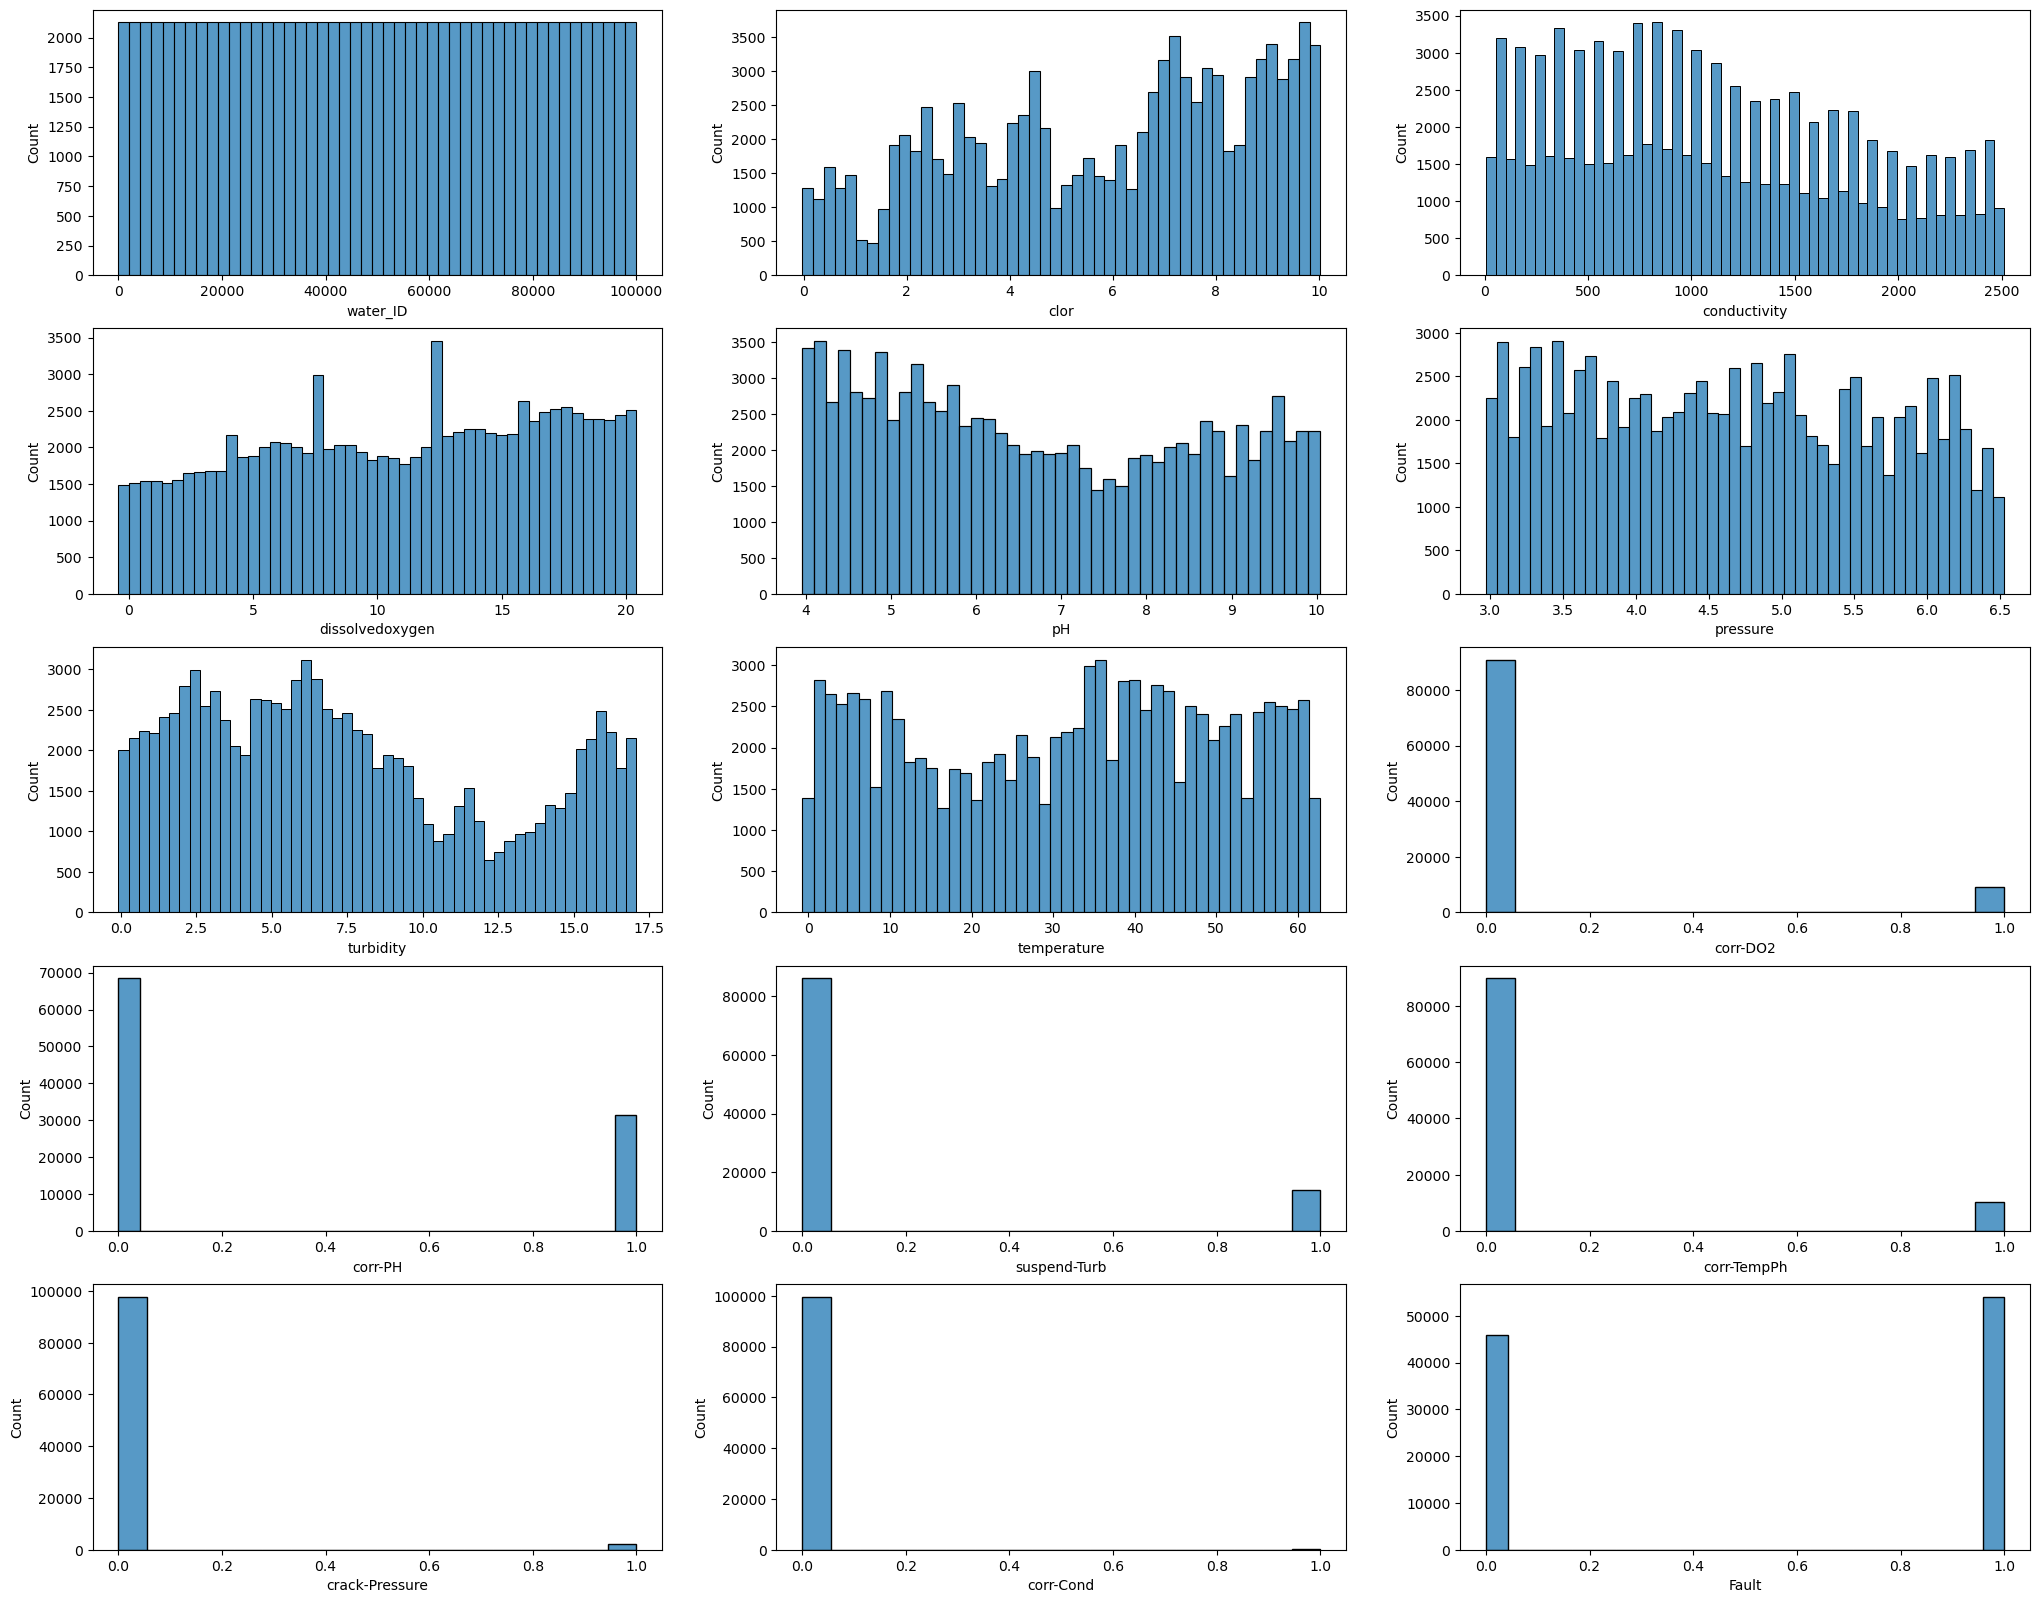

In [8]:
fig, ax = plt.subplots(5, 3, figsize=(25, 20))

for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=ax[i//3][i%3])

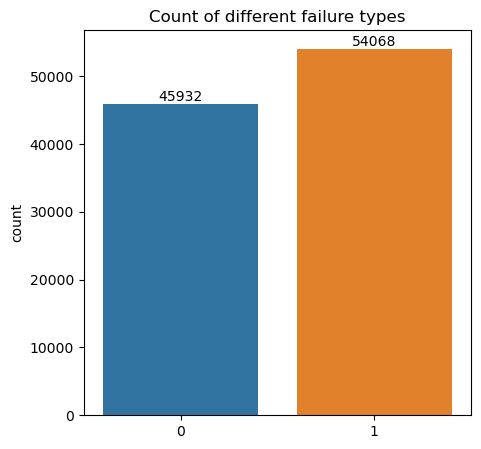

In [9]:
failure_types = df.loc[:, ['Fault']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

## **Handling outliers**❗

In [10]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Fault']

Calculate and handle the outliers for each attribute using IQR and Winsorization 

## **Transformation** ⛏️

Normalize the attributes using z-score

$z = \frac{x - \mu} {\sigma}$, $\mu:$ Mean, $σ:$ Standard deviation

In [11]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df[col] = zscore(df[col])

## **More visualizations** 📊 

Finding the correlation between the attributes with threshold = 0.3


<AxesSubplot:>

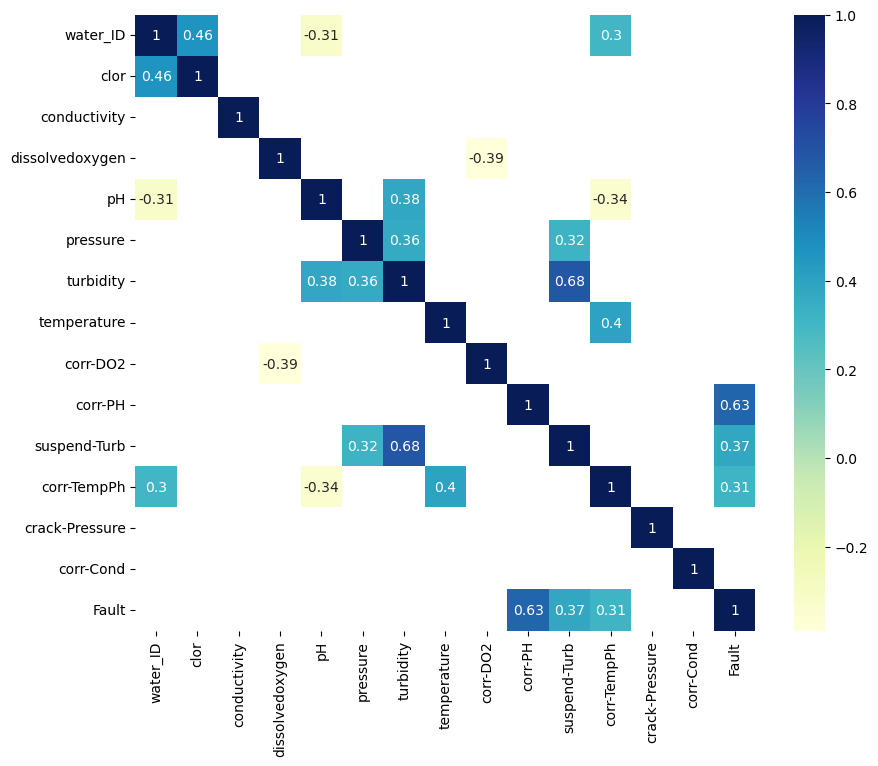

In [13]:
# There are strongly correlated features
threshold = 0.3
correlation = df.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, mask=matrix)

# **Descriptive analytics** 📝

## **Clustering** 🧩

In [16]:
# features to use for clustering
X = df[["clor", "conductivity", "dissolvedoxygen", "pH", "pressure", "turbidity", "temperature"]]

* Partitional Clustering, **K-means algorithm**

Elbow method to determine the optimal number (k) of clusters

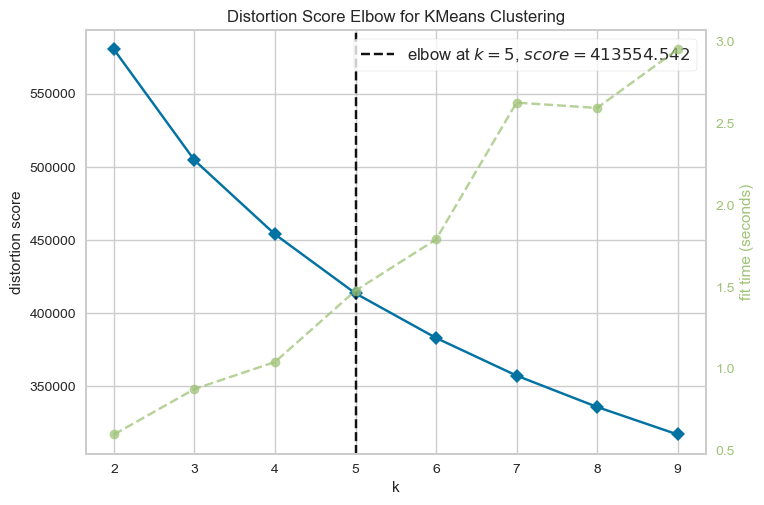

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# K-means clustering
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10)) # it turns out that k = 4 is the optimal number of clusters 

visualizer.fit(X)
visualizer.show()

In [18]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=2,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

df["kmeans_cluster"] = kmeans.predict(X)

Plot the results

<Figure size 1000x800 with 0 Axes>

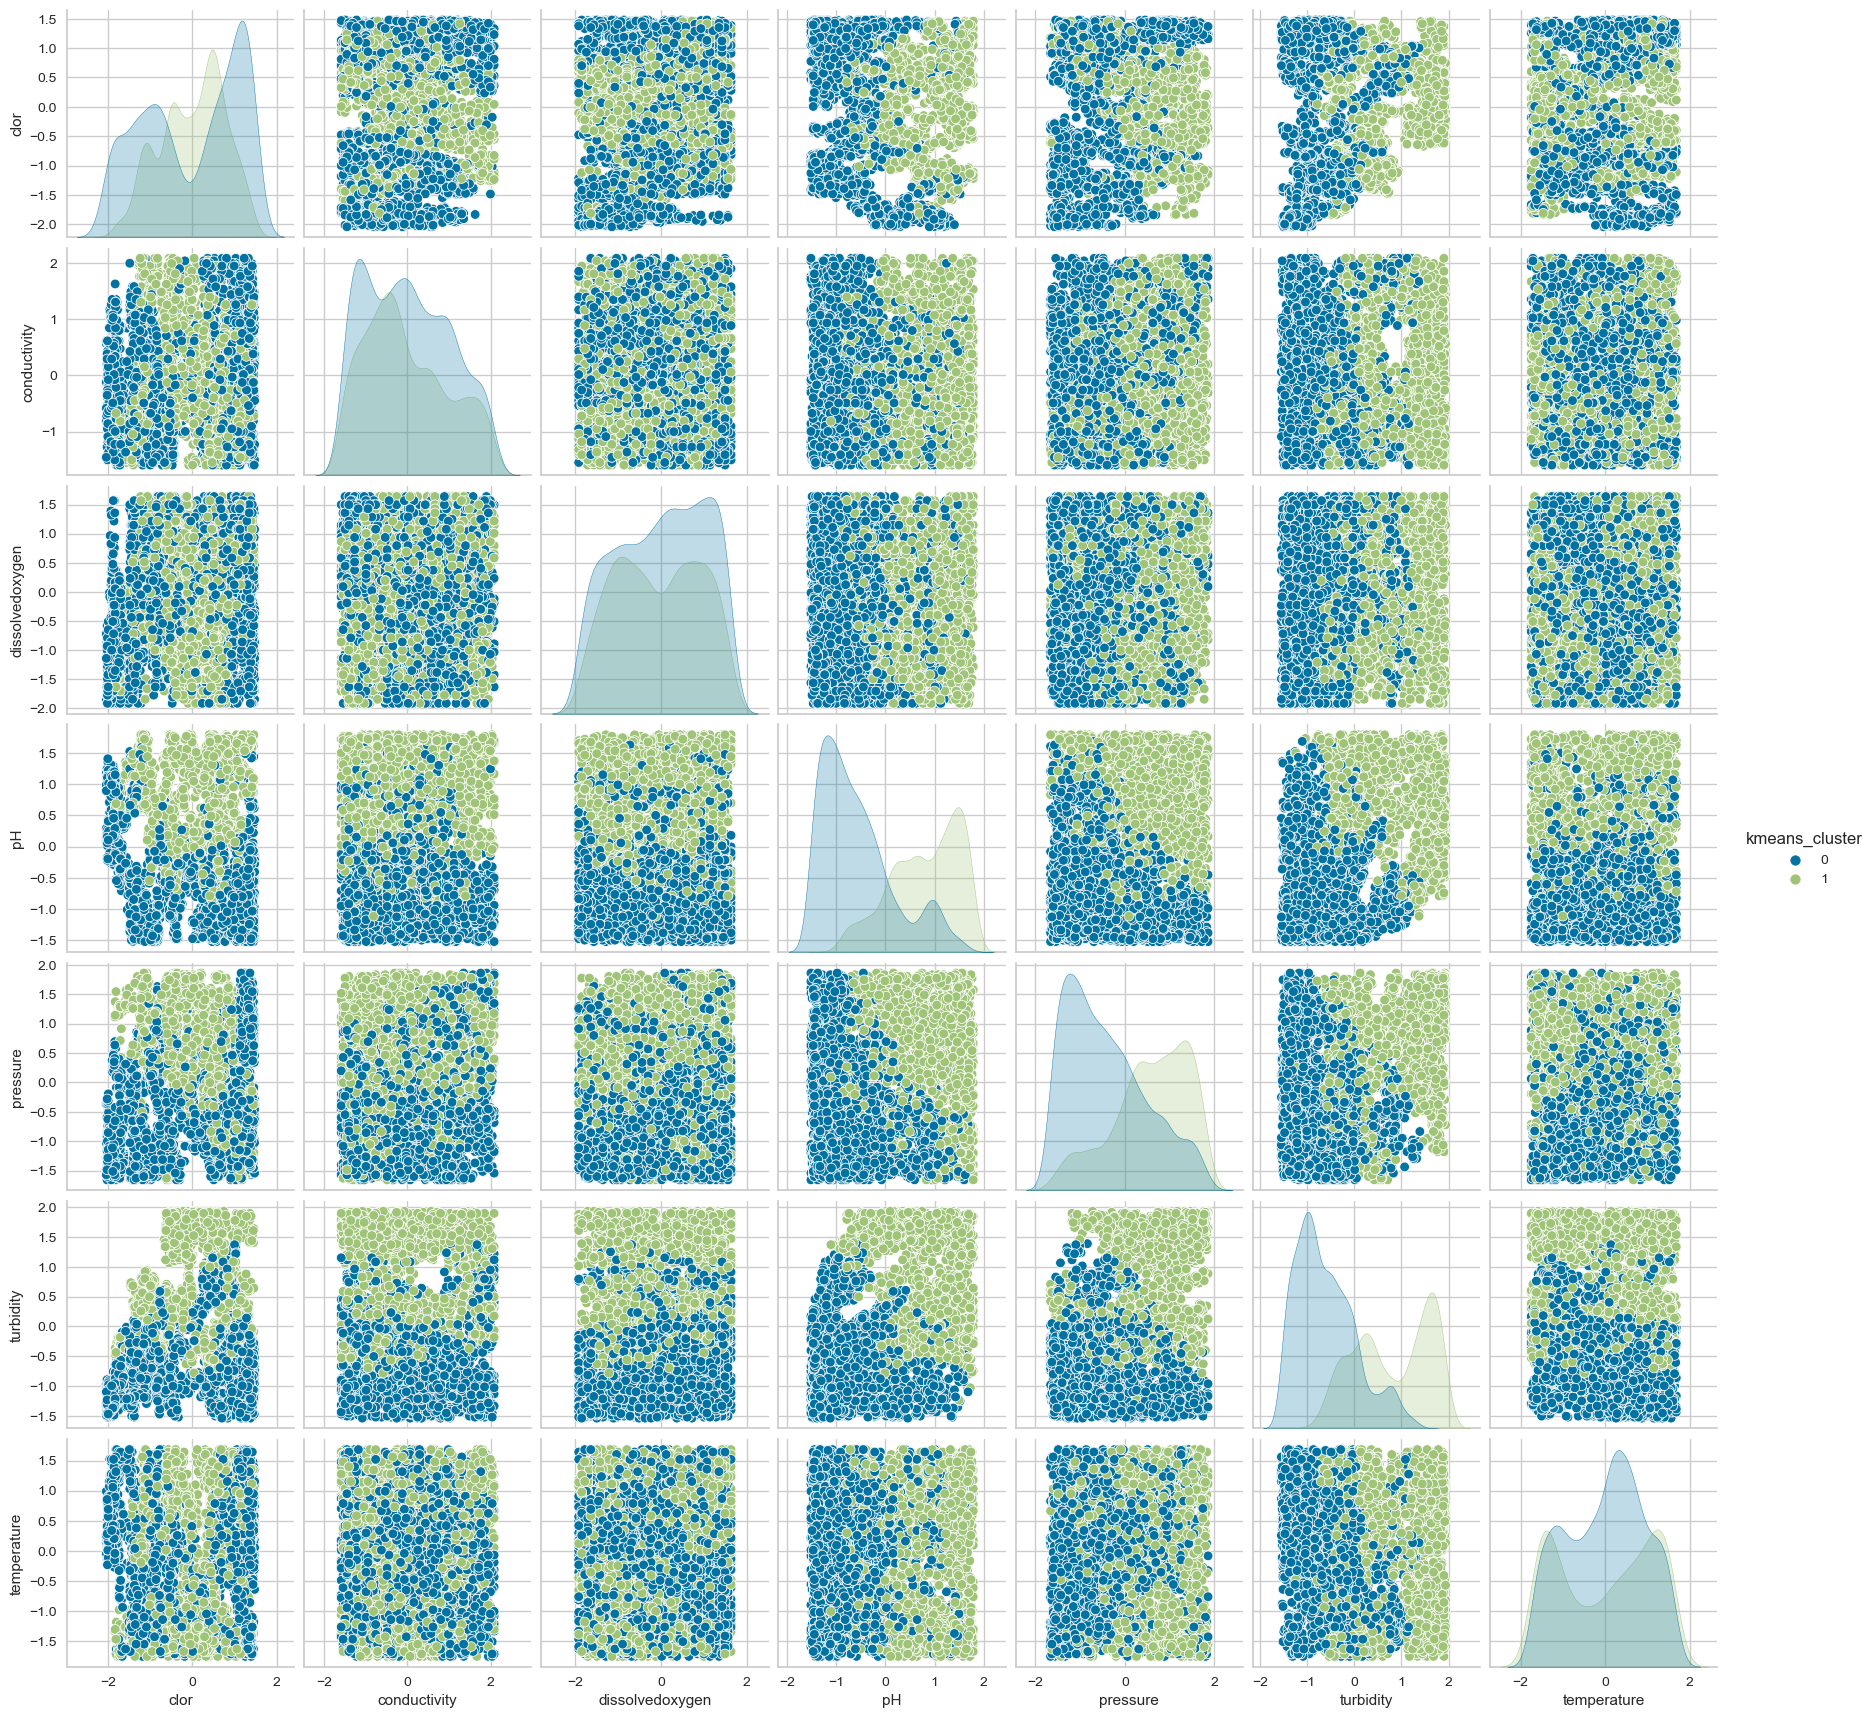

In [19]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["clor", "conductivity", "dissolvedoxygen", "pH", "pressure", "turbidity", "temperature"])
plt.show()

Silhouette coefficient for k-means algorithm

In [20]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.172


* Hierarchical clustering, **Agglomerative**

Determining EPS and MinPts for DBSACN algorithm

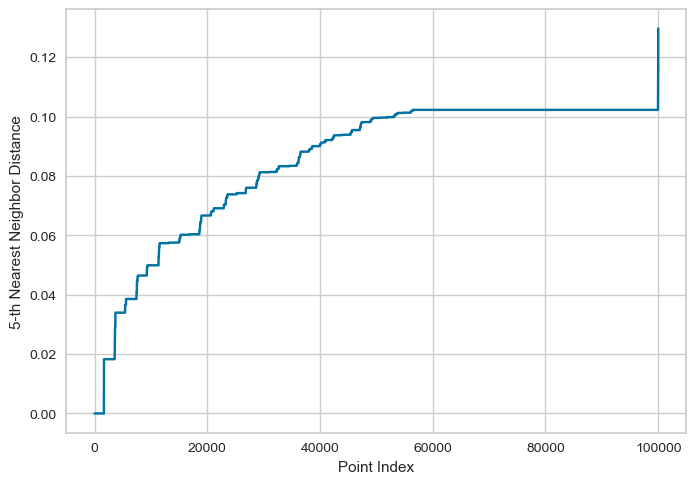

In [21]:
from sklearn.neighbors import NearestNeighbors

k = 2

# create the nearest neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# get the distances and indices of the kth nearest neighbors for each point
distances, indices = nn.kneighbors(X)

# get the kth nearest neighbor distances for each point
kth_distances = distances[:, k-1]

# sort the kth nearest neighbor distances
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()

In [22]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(X)

# obtain the cluster labels
df['dbscan_cluster'] = model.labels_

Plot the results

# **Modeling** 🧪

In [23]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## **Data splitting and sampling** 🧮

In [24]:
df.columns

Index(['water_ID', 'clor', 'conductivity', 'dissolvedoxygen', 'pH', 'pressure',
       'turbidity', 'temperature', 'corr-DO2', 'corr-PH', 'suspend-Turb',
       'corr-TempPh', 'crack-Pressure', 'corr-Cond', 'Fault', 'kmeans_cluster',
       'dbscan_cluster'],
      dtype='object')

Split the dataset (70% train : 30% test)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop(['corr-DO2', 'corr-PH', 'suspend-Turb','corr-TempPh', 'crack-Pressure', 'corr-Cond', 'Fault', 'kmeans_cluster',
       'dbscan_cluster'], axis=1)
y = df["Fault"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

Because the data is imbalanced, we oversample the training set

(array([32152.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 37848.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

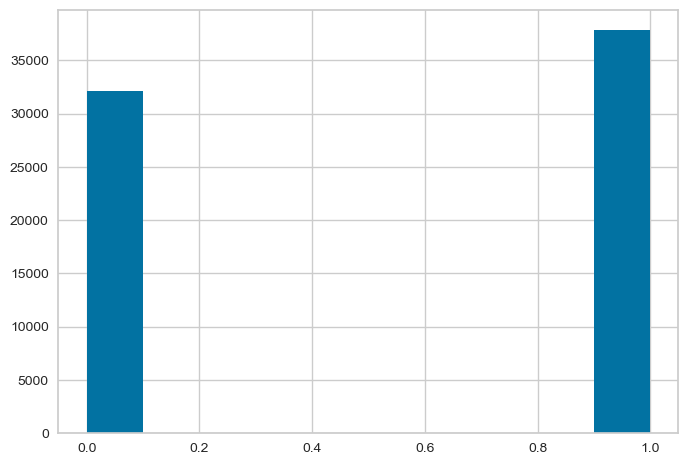

In [26]:
plt.hist(y_train)

## **Decision Tree Model**

Build the model

In [27]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [28]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13780
           1       1.00      1.00      1.00     16220

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



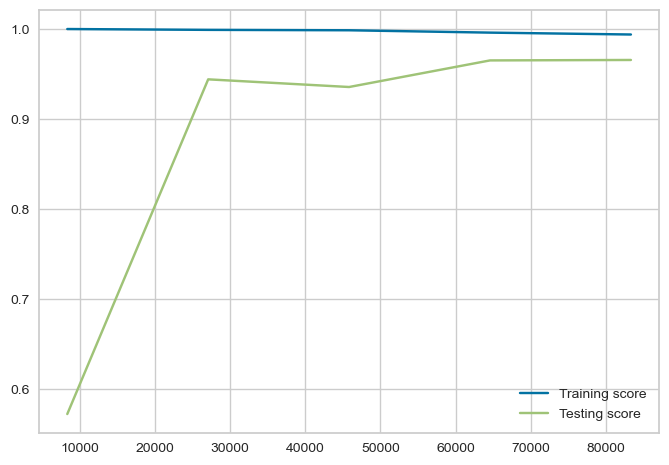

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=6)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Decision Tree model

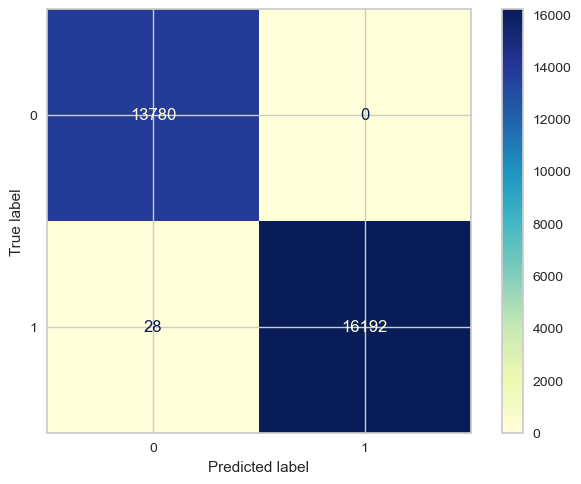

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [31]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

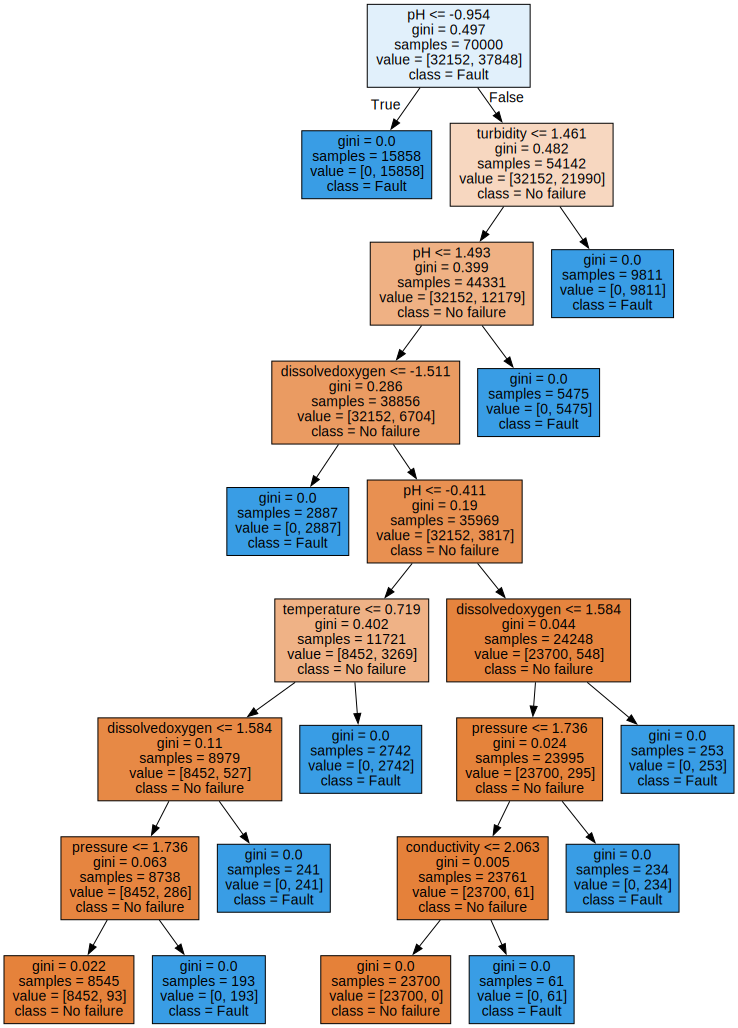

In [32]:
import graphviz
from sklearn import tree

data = tree.export_graphviz(model,
                            feature_names=X.columns,  
                            class_names=['No failure','Fault'],
                            filled=True)

# draw graph
graph = graphviz.Source(data, format="png") 
graph.render('nodes', view=False)
graph

In [33]:
from sklearn.tree import export_text

rules = export_text(model)

# print the rules
print(rules)

|--- feature_4 <= -0.95
|   |--- class: 1
|--- feature_4 >  -0.95
|   |--- feature_6 <= 1.46
|   |   |--- feature_4 <= 1.49
|   |   |   |--- feature_3 <= -1.51
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  -1.51
|   |   |   |   |--- feature_4 <= -0.41
|   |   |   |   |   |--- feature_7 <= 0.72
|   |   |   |   |   |   |--- feature_3 <= 1.58
|   |   |   |   |   |   |   |--- feature_5 <= 1.74
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_5 >  1.74
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_3 >  1.58
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_7 >  0.72
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  -0.41
|   |   |   |   |   |--- feature_3 <= 1.58
|   |   |   |   |   |   |--- feature_5 <= 1.74
|   |   |   |   |   |   |   |--- feature_2 <= 2.06
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  2.06
| 

## **k-NN (K-nearest neighbors) Model**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print(grid_search.best_params_)

C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

{'n_neighbors': 3}


Build the model

In [35]:
start = time.time()
model = KNeighborsClassifier(n_neighbors=2).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [36]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13780
           1       0.99      0.95      0.97     16220

    accuracy                           0.97     30000
   macro avg       0.97      0.97      0.97     30000
weighted avg       0.97      0.97      0.97     30000



C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\seda\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

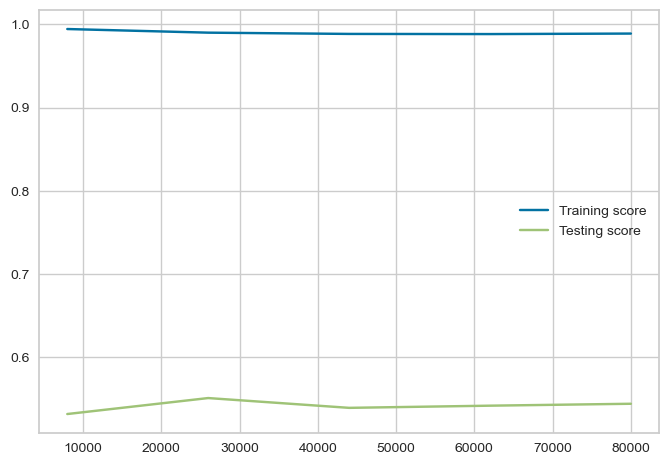

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of k-NN model

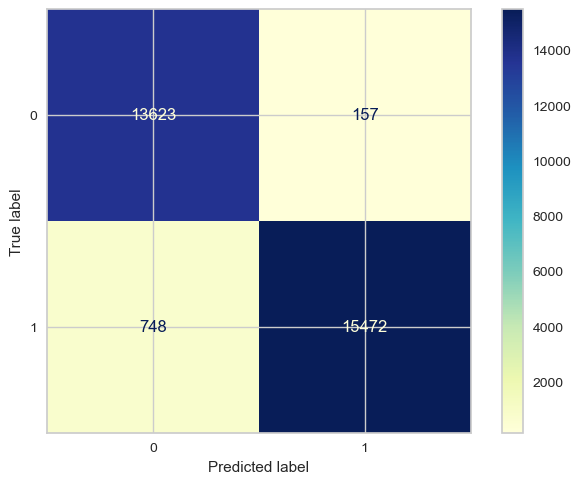

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **Random Forest Model**

Build the model

In [39]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure


In [40]:
print("Random Forest Model\n" + classification_report(y_test, y_predictions))

Random Forest Model
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13780
           1       1.00      1.00      1.00     16220

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



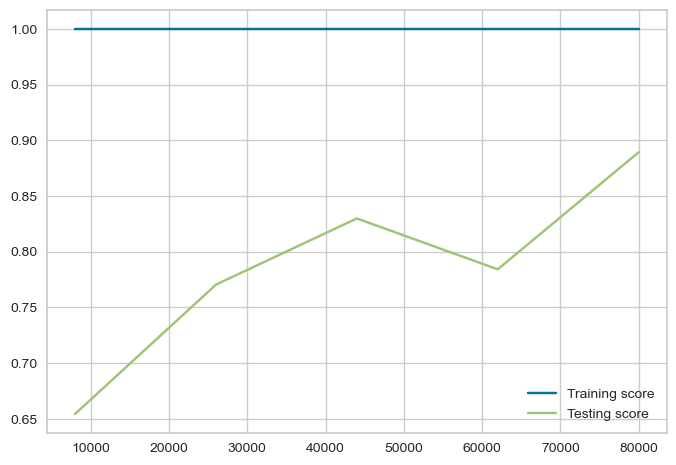

In [41]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Random Forest model

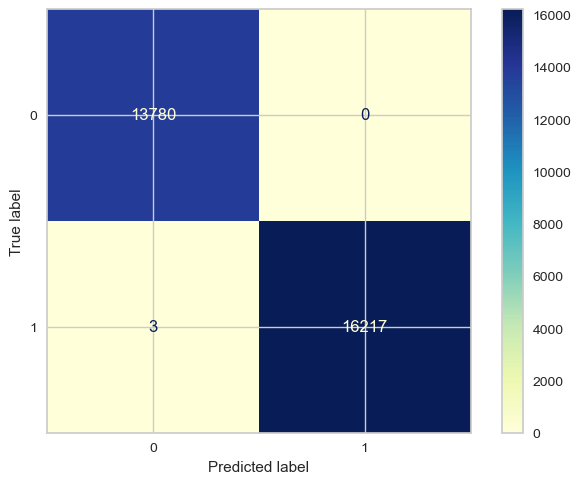

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **Gradient Boosting Model**

Build the model

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=100, max_depth=6).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [44]:
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13780
           1       1.00      0.99      1.00     16220

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



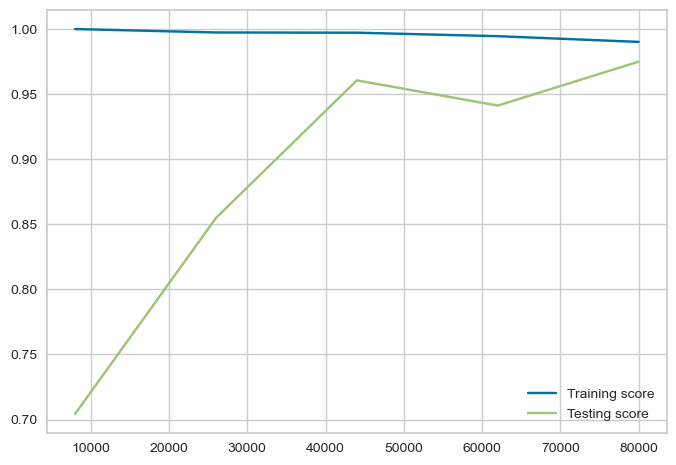

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gradient Boosting model

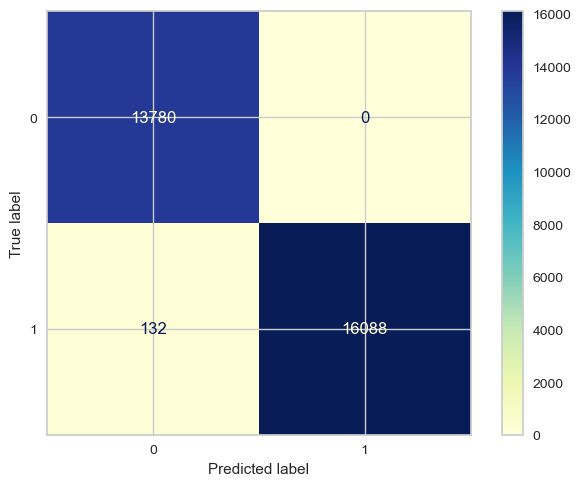

In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **Gaussian Naive Bayes Model**

Build the model

In [47]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model = GaussianNB(var_smoothing=1e-5 ).fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [48]:
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.76      0.66      0.70     13780
           1       0.74      0.82      0.78     16220

    accuracy                           0.75     30000
   macro avg       0.75      0.74      0.74     30000
weighted avg       0.75      0.75      0.74     30000



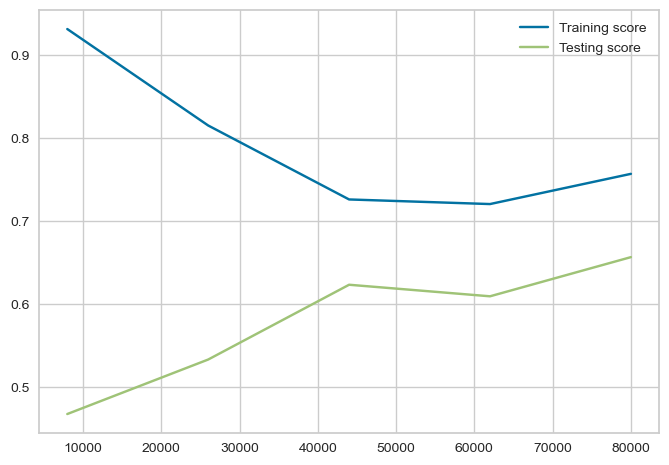

In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

Confusion matrix of Gaussian Naive Bayes model

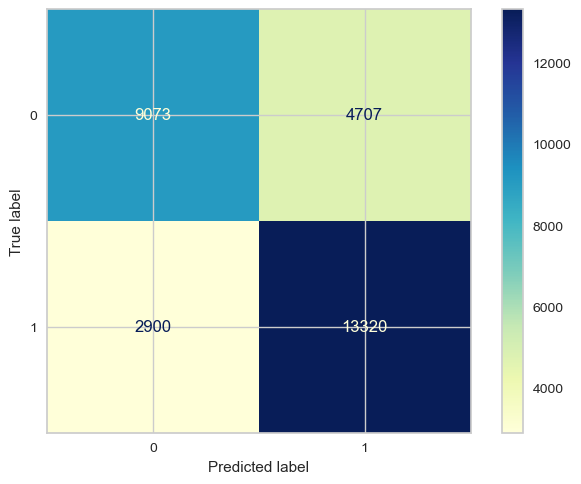

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## **MLP (Multi-layer Perceptron) Model**

Build the model

In [51]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train, y_train)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

Model evaluation for each Machine failure class:

0. No failure
1. Machine failure

In [52]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     13780
           1       0.99      0.98      0.98     16220

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000



In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

In [ ]:
plt.plot(model.loss_curve_)

Confusion matrix of Multi-layer Perceptron model

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

# **Evaluation** 🎲

In [ ]:
model_performance.style.background_gradient(cmap='coolwarm')